In [121]:
import numpy as np
npoints = 100
xvals = np.linspace(-2, 3, npoints)
noise = np.random.randn(npoints)
yvals = 2 * xvals ** 3 - xvals ** 2 - 5 * xvals + noise

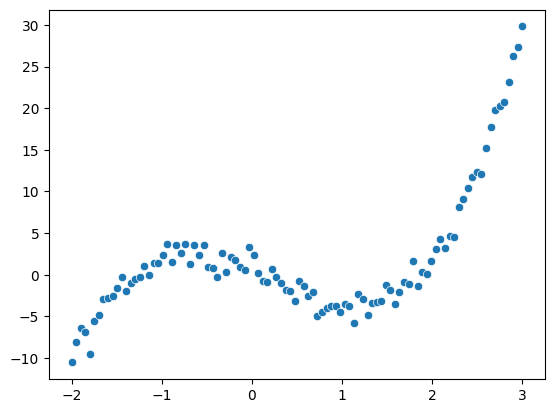

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=xvals, y=yvals)
plt.show()

In [123]:
lr = 0.001

class CurveFitter():
    def __init__(self, highest_degree):
        self.highest_degree = highest_degree
        self.weights = np.random.randn(highest_degree + 1)

    def activate(self, x):
        inputs = [np.power(x, p) for p in range(1, self.highest_degree + 1)]
        inputs.append(1)
        inputs = np.array(inputs)
        y = np.dot(self.weights, inputs)
        return inputs, y

    def predict(self, x):
        return self.activate(x)[1]

    def train(self, x, y):
        inputs, y_pred = self.activate(x)
        self.weights = np.array([w + lr * (y - y_pred) * inputs[i] for i, w in enumerate(self.weights)])
        
        

In [193]:
cv = CurveFitter(3)
epochs = 1000
mse = []

for e in range(epochs):
    for x, y in zip(xvals, yvals):
        cv.train(x, y)
    y_pred = np.array([cv.predict(x) for x in xvals])
    error = np.mean((yvals - y_pred) ** 2)
    mse.append(error)

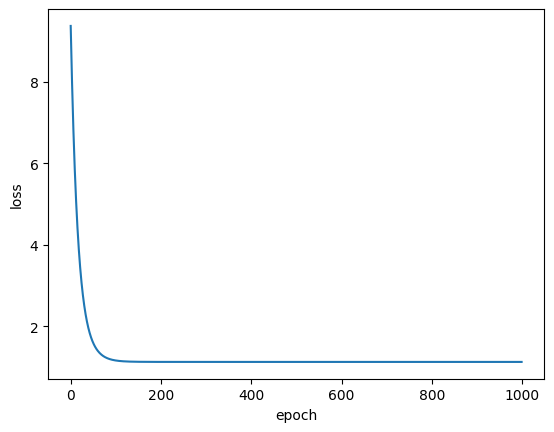

In [194]:
sns.lineplot(mse)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

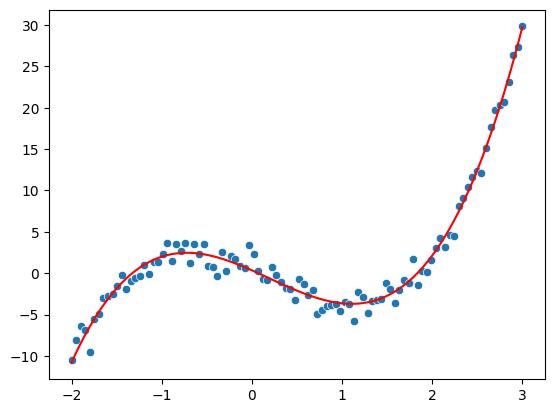

In [195]:
ax = sns.scatterplot(x=xvals, y=yvals)
sns.lineplot(x=xvals, y=y_pred, color="red")
plt.show()